# (US flight comaprison before and after COVID19)
## by (Mohamed Fathy)

## Preliminary Wrangling

> This dataset contain a small summary about US flight statistics for the period of sep and oct 2019 & 2020 to compare some insights about flights and ontime performance before and post COVID-19
the data collected from the official site for us transportation statistics and here is the link for more info : 
https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Here we first load the data and then discover together some insight as follows

In [2]:
# load the csv files data into panda dataframe.
df1 = pd.read_csv('flights_sep2019.csv')
df2 = pd.read_csv('flights_oct2019.csv')
df3 = pd.read_csv('flights_sep2020.csv')
df4 = pd.read_csv('flights_oct2020.csv')

In [3]:
# As we downloded file sepreatly by month , here we concatinate them into one dataframe.
df = pd.concat([df1, df2, df3, df4], sort=False)
df.shape

(1917446, 16)

In [4]:
df.head()

,YEAR,MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 15
0,2019,9,WN,573,CVG,BWI,606.0,1.0,732.0,-3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,9,WN,2144,CVG,BWI,1640.0,5.0,1755.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,9,WN,2205,CVG,BWI,1038.0,-2.0,1200.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,9,WN,1246,CVG,DEN,1935.0,0.0,2017.0,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,9,WN,256,CVG,MDW,1721.0,-4.0,1734.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# explore and the data and its types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917446 entries, 0 to 352105
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   OP_UNIQUE_CARRIER    object 
 3   OP_CARRIER_FL_NUM    int64  
 4   ORIGIN               object 
 5   DEST                 object 
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   ARR_TIME             float64
 9   ARR_DELAY            float64
 10  CARRIER_DELAY        float64
 11  WEATHER_DELAY        float64
 12  NAS_DELAY            float64
 13  SECURITY_DELAY       float64
 14  LATE_AIRCRAFT_DELAY  float64
 15  Unnamed: 15          float64
dtypes: float64(10), int64(3), object(3)
memory usage: 248.7+ MB


In [6]:
# change time format 
df['DEP_TIME'] = df.DEP_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['ARR_TIME'] = df.ARR_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)


In [7]:
# display the data
df.head()

,YEAR,MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 15
0,2019,9,WN,573,CVG,BWI,0606,1.0,0732,-3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,9,WN,2144,CVG,BWI,1640,5.0,1755,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,9,WN,2205,CVG,BWI,1038,-2.0,1200,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,9,WN,1246,CVG,DEN,1935,0.0,2017,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,9,WN,256,CVG,MDW,1721,-4.0,1734,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# renamed the coulmn unmaed to be understood.
df.rename(columns={'Unnamed: 15': 'AA'})

,YEAR,MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AA
0,2019,9,WN,573,CVG,BWI,0606,1.0,0732,-3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,9,WN,2144,CVG,BWI,1640,5.0,1755,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,9,WN,2205,CVG,BWI,1038,-2.0,1200,-5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,9,WN,1246,CVG,DEN,1935,0.0,2017,-8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,9,WN,256,CVG,MDW,1721,-4.0,1734,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352101,2020,10,UA,468,SNA,DEN,1335,-9.0,1645,-18.0,NaN,NaN,NaN,NaN,NaN,NaN
352102,2020,10,UA,467,EWR,MIA,1030,0.0,1339,9.0,NaN,NaN,NaN,NaN,NaN,NaN
352103,2020,10,UA,465,DEN,BIL,1914,-6.0,2035,-19.0,NaN,NaN,NaN,NaN,NaN,NaN
352104,2020,10,UA,464,DEN,PDX,1137,1.0,1301,-23.0,NaN,NaN,NaN,NaN,NaN,NaN


### What is the structure of your dataset?

> There is 1917446 rows and 16 columns contains flight details and voulme and their ontime performance as a copamrison between flight before and after covid 19

### What is/are the main feature(s) of interest in your dataset?

> I need to focus on voulme of flight between 2019 and 2020 and the affect of that diffrence for ontime performance 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the maim features we will use on this investigation is  ( year , month , carrie , flight numbers , depdelay , arrdelay and delay reason is five reason  [CarrierDelay,WeatherDelay, National Air System Delay, Security Delay and Late Aircraft Delay] )

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

# what is the most opearting carrier?

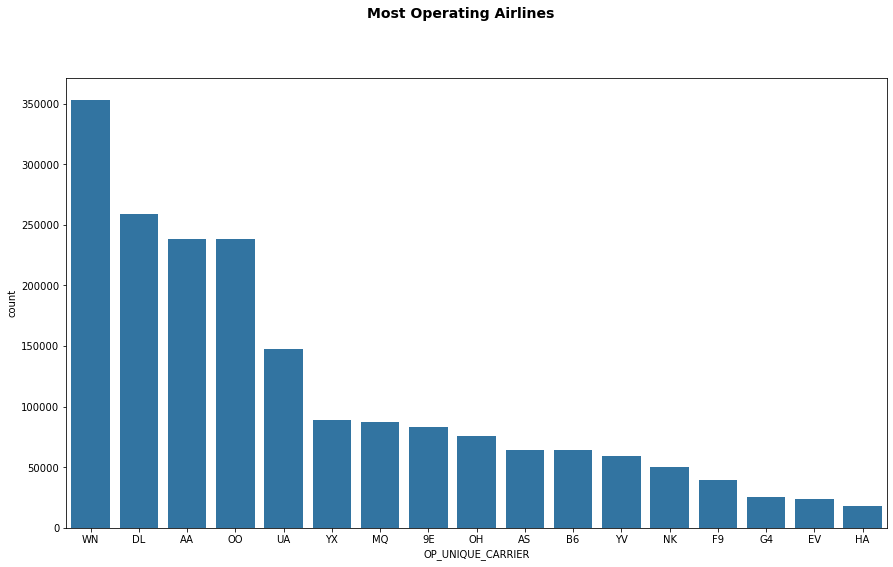

In [9]:
# create a color base palette and Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
plt.figure(figsize=[14.70, 8.27])
# create a plt by seaborne and Use the `color` argument
sb.countplot(data=df, x='OP_UNIQUE_CARRIER', color=base_color, order=[5,1,3,4,2,7,6]);
freq = df['OP_UNIQUE_CARRIER'].value_counts()
gen_order = freq.index
sb.countplot(data=df, x='OP_UNIQUE_CARRIER', color=base_color, order=gen_order);
plt.suptitle("Most operating airlines " .title(), y = 1,
            fontsize = 14, weight = "bold");


> as we saw here the biggest airline by voulme is wn(southwest airlines) , then Dl ( Delta ) then AA ( American airlines) then OO (Skywest airlines) and UA (united airlines) AS TOP5 AIRLINES  . 

### What is the distribution of Departure delay?

### 1-  sep 2019

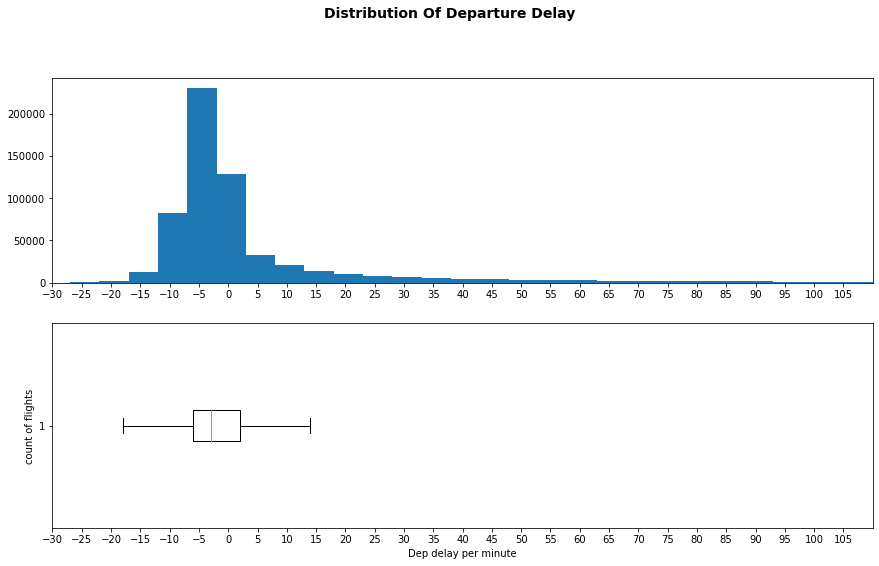

In [10]:
# define the figure size for the hist
plt.figure(figsize=[14.70, 8.27])

# Create bins with step-size 5
plt.subplot(2,1,1)
step = 5
#limit the hist with min amd max depdelay
x_min, x_max = -30, 110
bin_edges = np.arange(df1.DEP_DELAY.min()-step, df1.DEP_DELAY.max()+step, step)
plt.hist(df1.DEP_DELAY, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step))
plt.suptitle("distribution of Departure delay".title(), y = 1,
            fontsize = 14, weight = "bold");

plt.subplot(2,1,2)
plt.boxplot(x=df1[pd.notnull(df1.DEP_DELAY)].DEP_DELAY, vert=False, showfliers=False)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));
# Labeling the axes
plt.xlabel('Dep delay per minute')
plt.ylabel('count of flights');


> as we see here we have balance between before actual time arrival and then delay from 5 minutes till 75 minutes delays . 

### 2-  sep 2020

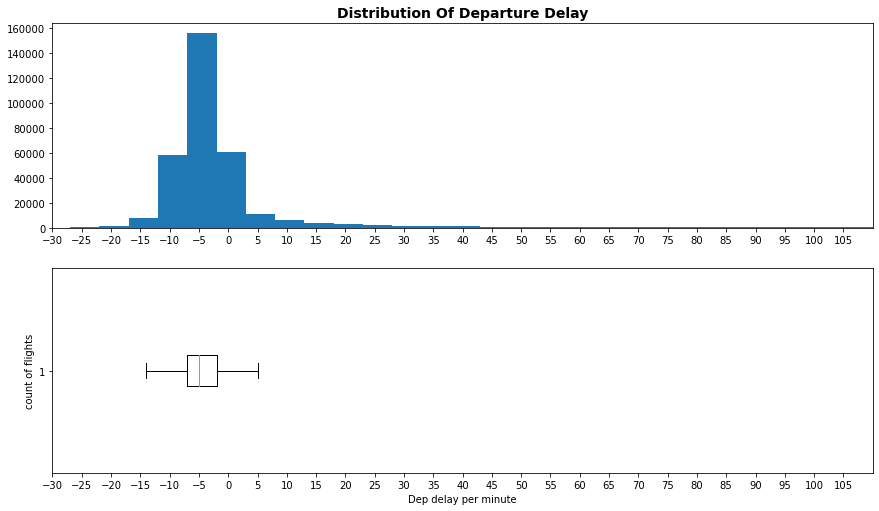

In [11]:
# define the figure size for the hist
plt.figure(figsize=[14.70, 8.27])
# Create bins with step-size 5
plt.subplot(2,1,1)
step = 5
#limit the hist with min amd max depdelay
x_min, x_max = -30, 110
bin_edges = np.arange(df3.DEP_DELAY.min()-step, df3.DEP_DELAY.max()+step, step)
plt.hist(df3.DEP_DELAY, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step))
plt.title('distribution of Departure delay'.title(), y = 1,
            fontsize = 14, weight = "bold");


plt.subplot(2,1,2)
plt.boxplot(x=df3[pd.notnull(df3.DEP_DELAY)].DEP_DELAY, vert=False, showfliers=False)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));
# Labeling the axes
plt.xlabel('Dep delay per minute')
plt.ylabel('count of flights');

> here we have good ontime performance as most of flight depart before schdule and percentage of departure is less than 10 minutes. 

### What is the distribution of arrival delay?

### 3-  oct 2019

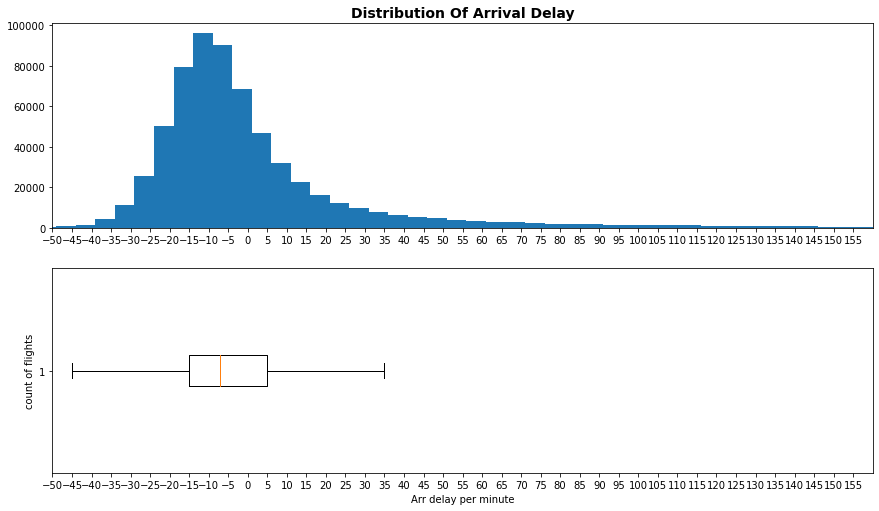

In [12]:
# define the figure size for the hist
plt.figure(figsize=[14.70, 8.27])
# Create bins with step-size 5
plt.subplot(2,1,1)
step = 5
#limit the hist with min amd max depdelay
x_min, x_max = -50, 160
bin_edges = np.arange(df2.ARR_DELAY.min()-step, df2.ARR_DELAY.max()+step, step)
plt.hist(df2.ARR_DELAY, bins=bin_edges)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step))
plt.title('distribution of Arrival delay'.title(), y = 1,
            fontsize = 14, weight = "bold");


plt.subplot(2,1,2)
plt.boxplot(x=df2[pd.notnull(df2.ARR_DELAY)].ARR_DELAY, vert=False, showfliers=False)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));
# Labeling the axes
plt.xlabel('Arr delay per minute')
plt.ylabel('count of flights');

> here we have balance also between arrival before schdule and behind schdule . we have alittle bit late arrival delay till 130 minute .

### for oct 2020

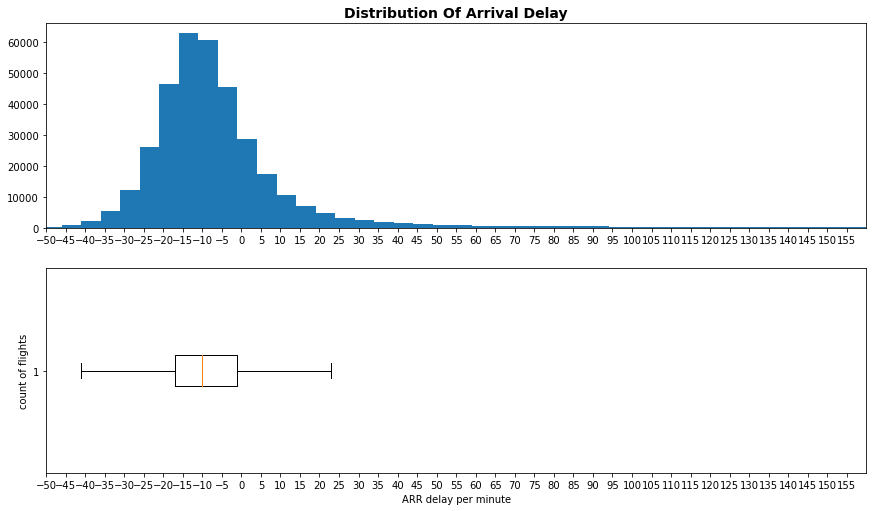

In [13]:
# define the figure size for the hist
plt.figure(figsize=[14.70, 8.27])
# Create bins with step-size 5
plt.subplot(2,1,1)
step = 5
#limit the hist with min amd max depdelay
x_min, x_max = -50, 160
bin_edges = np.arange(df4.ARR_DELAY.min()-step, df4.ARR_DELAY.max()+step, step)
plt.hist(df4.ARR_DELAY, bins=bin_edges)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step))
plt.title('distribution of Arrival delay'.title(), y = 1,
            fontsize = 14, weight = "bold");


plt.subplot(2,1,2)
plt.boxplot(x=df4[pd.notnull(df4.ARR_DELAY)].ARR_DELAY, vert=False, showfliers=False)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));
# Labeling the axes
plt.xlabel('ARR delay per minute')
plt.ylabel('count of flights');

> on 2020 the percent of arrival before schdule is high than 2019 and also the delayed flight by miunte is the better than 2019 by max 70 minutes delay. 

## what is the diffrence between pre and post covid19 flights voulme?

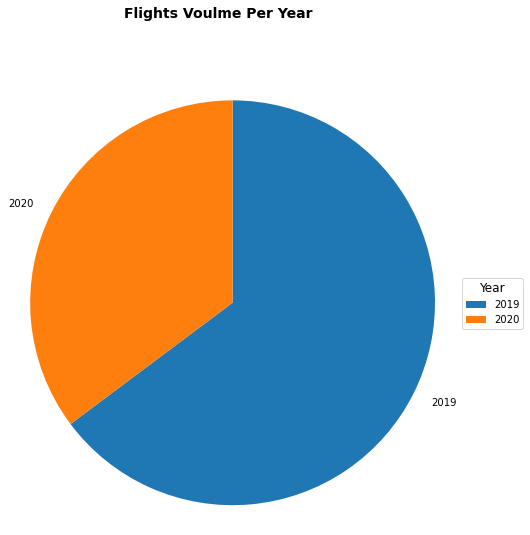

In [14]:
# we Use the Year dataset to count the flight per year
plt.figure(figsize=[14.70, 8.27])
sorted_counts = df['YEAR'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
# We have the used option `Square`for pie chart. 
plt.axis('square')
plt.suptitle("Flights Voulme per year".title(), y = 1,
            fontsize = 14, weight = "bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Year", title_fontsize = 12);

> unfortunatly , 2020 is less than 2019 .

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> till now the single variable insight was enogh to expolre some insight regarding flight and ontime performance about pre and post cvoid 19 flights , there is no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the data was ok and clean as per insights needs , we only merged the the four dataframe into one datafrme to get the required insights.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the Diffence between flights on 2019 & 2020?

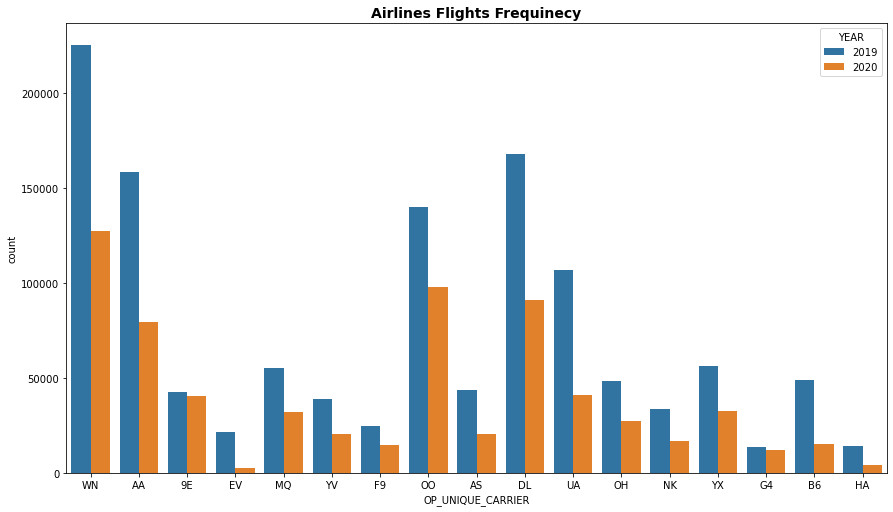

In [15]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data = df, x = 'OP_UNIQUE_CARRIER', hue = 'YEAR')
plt.title('Airlines Flights Frequinecy'.title(), y = 1,
            fontsize = 14, weight = "bold");

> unfortunatly , 2020 is less than 2019 .

### What is the relationship between Number of flight & airlines?

In [16]:
flt_airlines = df.groupby(['OP_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER'], as_index=False).count()
flt_airlines = flt_airlines[['OP_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER']]

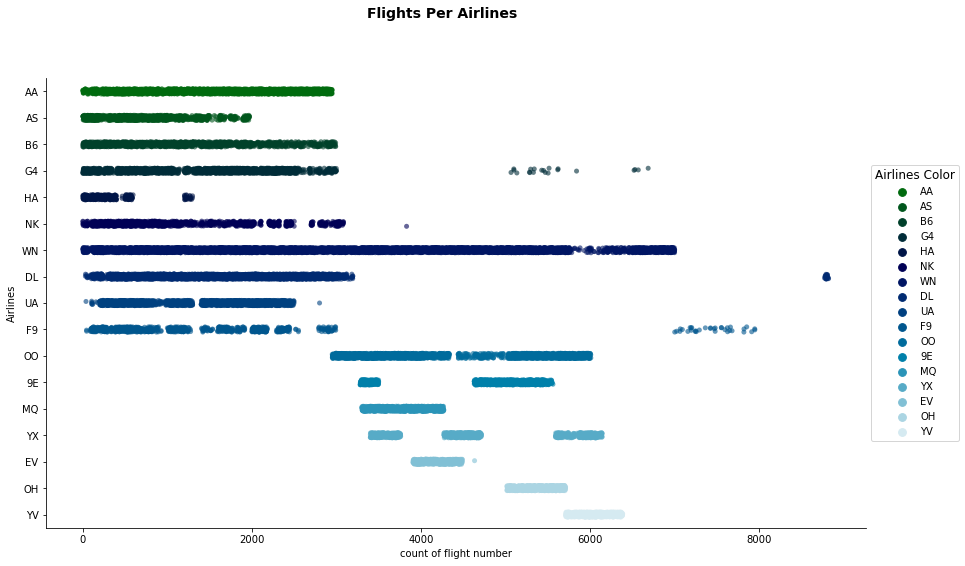

In [17]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

plt.figure(figsize=[14.70, 8.27])

plot = sns.stripplot(x='OP_CARRIER_FL_NUM', y='OP_UNIQUE_CARRIER', hue='OP_UNIQUE_CARRIER', data=flt_airlines, 
              palette='ocean', 
              jitter=True, edgecolor='none', alpha=.60)
plot.get_legend().set_visible(False)
sns.despine()
plt.xlabel('count of flight number')
plt.ylabel('Airlines')
plt.suptitle("Flights per airlines".title(), y = 1,
            fontsize = 14, weight = "bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Airlines Color", title_fontsize = 12);


No handles with labels found to put in legend.


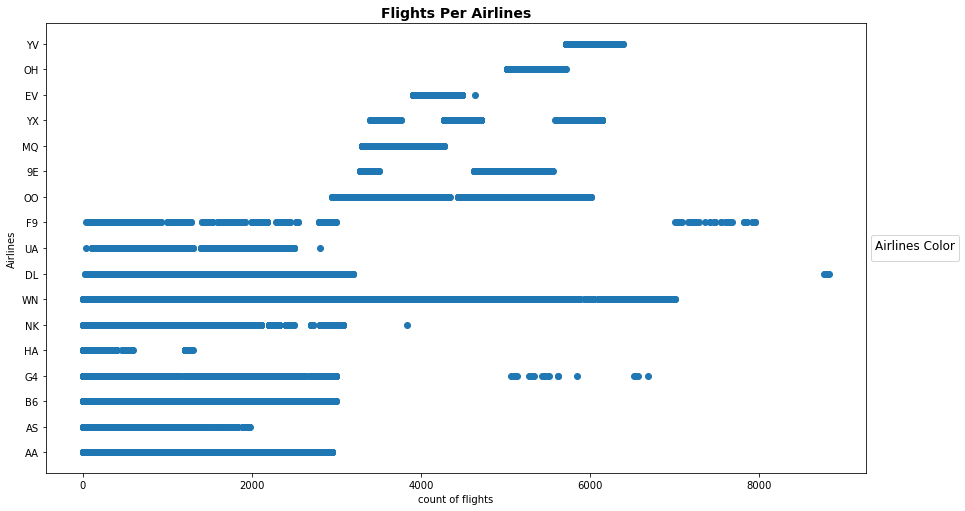

In [18]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
plt.scatter(flt_airlines.OP_CARRIER_FL_NUM, flt_airlines.OP_UNIQUE_CARRIER);
plt.xlabel('count of flights')
plt.ylabel('Airlines')
plt.title('Flights per airlines'.title(), y = 1,
            fontsize = 14, weight = "bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Airlines Color", title_fontsize = 12);

> the top 5 airlines on both 2019 and 2020 is southwest on the top and the fifth is united airlines

## What is the relationship between airlines and their departure and arrival delay by month?

<Figure size 432x288 with 0 Axes>

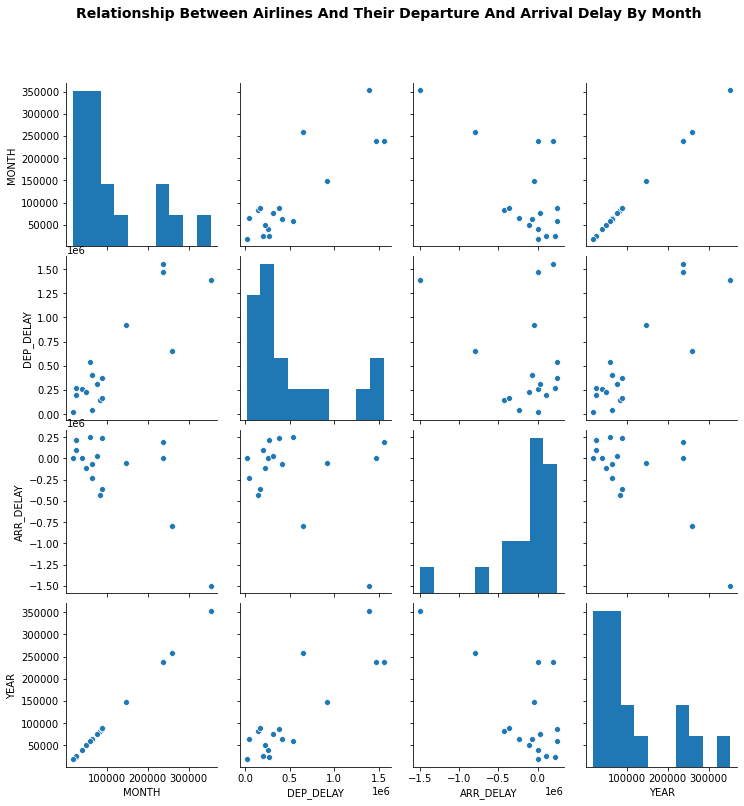

In [19]:
# groupby and merge airlines with month of operation and dep delay.

sample = df.groupby('OP_UNIQUE_CARRIER')
sample = pd.merge(
    pd.DataFrame(sample.MONTH.count()), 
    pd.DataFrame(sample.DEP_DELAY.sum()), 
    on='OP_UNIQUE_CARRIER'
).merge(
    pd.DataFrame(sample.ARR_DELAY.sum()), on='OP_UNIQUE_CARRIER'
).merge(
    pd.DataFrame(sample.YEAR.count()), on='OP_UNIQUE_CARRIER'
)
# plotting the data
plt.tight_layout();
sb.pairplot(sample);
plt.suptitle('relationship between airlines and their departure and arrival delay by month'.title(),y = 1.1,
               fontsize = 14, weight = "bold");

> the correlation coefficients is diffrnce among month and dep& arr delay. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> as we see here 2020 it was the lowest voulme of flight but the best ontime performance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> as per my point of view ,no

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### what is the relationship between DEP_DELAY and ARR_DELAY  by month?

In [20]:
# chnage the type of month from int to object
df['MONTH'] = df.MONTH.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

In [21]:
# getting the mean and count the flight number.
flights_mean = df.groupby(['OP_CARRIER_FL_NUM','MONTH'], as_index=False).mean()
flights_count = df.groupby('OP_CARRIER_FL_NUM', as_index=False).count()

flights = flights_mean[['OP_CARRIER_FL_NUM','MONTH', 'DEP_DELAY','ARR_DELAY']].merge(
    flights_count[['OP_CARRIER_FL_NUM','YEAR']], on='OP_CARRIER_FL_NUM'
)
flights.rename(columns={'YEAR':'Count'}, inplace=True)

In [22]:
# getting some summary statistics 
Q1 = flights.quantile(.25)
Q3 = flights.quantile(.75)
IQ = Q3-Q1
Q_max = Q3+IQ*1.5
Q_min = Q1-IQ*1.5

In [23]:
# ignoring outliers
flights_filtered = flights[(flights.DEP_DELAY > Q_min.DEP_DELAY) & (flights.DEP_DELAY < Q_max.DEP_DELAY)]

flights_filtered = flights_filtered[
    (flights_filtered.Count > Q_min.Count) & (flights_filtered.Count < Q_max.Count)
]

flights_no_cxl = flights_filtered[flights_filtered.ARR_DELAY == 0]
flights_filtered = flights_filtered[flights_filtered.ARR_DELAY > 0]

flights_filtered.reset_index(inplace=True)

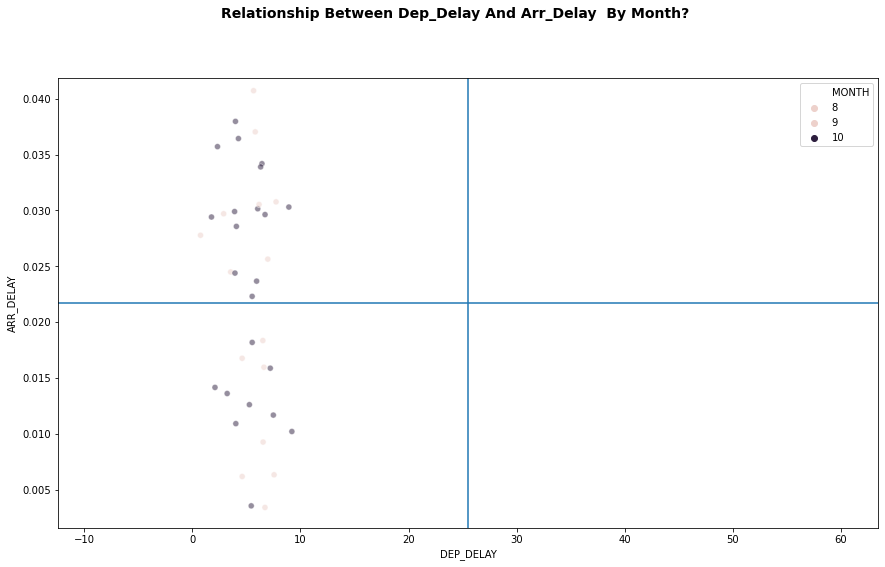

In [24]:
flights_filtered = flights[flights.ARR_DELAY > 0]
# plotting the data
plt.figure(figsize=[14.70, 8.27])
sb.scatterplot(flights_filtered.DEP_DELAY, flights_filtered.ARR_DELAY, alpha=.5, hue=flights_filtered.MONTH)

# x_max = max(flights_filtered.DepDelay)
x_max = 60
x_min = min(flights_filtered.DEP_DELAY)

# y_max = max(flights_filtered.ARR_DELAY)
y_max = .04
y_min = min(flights_filtered.ARR_DELAY)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x=x_max - (x_len/2));
plt.suptitle('relationship between DEP_DELAY and ARR_DELAY  by month?'.title(),y = 1,
               fontsize = 14, weight = "bold");

> most delayed flight on october.

## what is the relationship between the dep delay and arr delay for both year 2019&2020?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

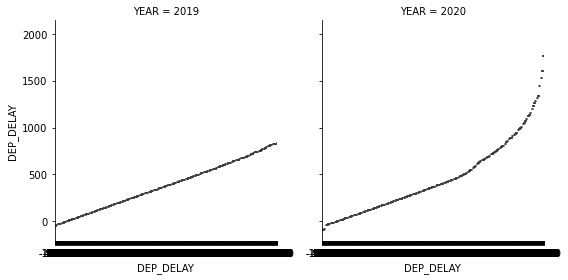

In [25]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = df, col = 'YEAR', size = 4)
g.map(sb.boxplot, 'DEP_DELAY', 'DEP_DELAY');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

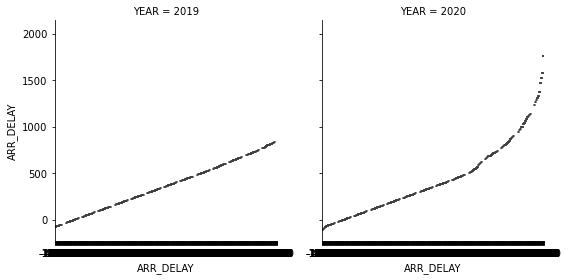

In [26]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = df, col = 'YEAR', size = 4)
g.map(sb.boxplot, 'ARR_DELAY', 'ARR_DELAY')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

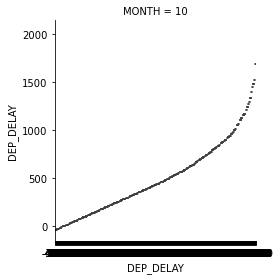

In [27]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = df2, col = 'MONTH', size = 4)
g.map(sb.boxplot, 'DEP_DELAY', 'DEP_DELAY')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

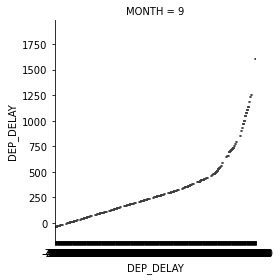

In [28]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = df3, col = 'MONTH', size = 4)
g.map(sb.boxplot, 'DEP_DELAY', 'DEP_DELAY')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

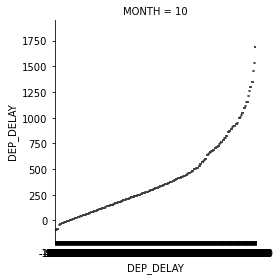

In [29]:
# plotting the data
plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = df4, col = 'MONTH', size = 4)
g.map(sb.boxplot, 'DEP_DELAY', 'DEP_DELAY')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> once we we try to discover which ontime performance is better is too diffucult as per voulme in 2020 less than 2019 so the performance is looking to be the same here .

### Were there any interesting or surprising interactions between features?

> also the 2020 is less than 2019 by flights but the ontime performance looks like the same .

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration.ipynb'])

1

In [35]:
!jupyter nbconvert exploration.ipynb--to slides --post serve  --no-input --no-prompt

zsh:1: command not found: jupyter
